# Introduction

As astronomers, we are frequently concerned with data which is presented to us in the form of images. These images can be small scale, such as a picture of an individual galaxy, or very large, such as of the full sky, in which case they are generally called maps. In either case, the form of the data is the same. An image is a record of what our instrument could see when we took the image. More formally, an image is simply an array of MxN pixels, where we have a mapping from a pixel (x,y) to a location on the sky, and the value of each pixel records something about the sky at that location, typically the intensity of light coming from that direction. Images may comprise multiple colors, or wavelengths, of light, in which case the array will have the shape CxMxN, where each MxN color array records the intensity of that color of light in the sky.

Since we spend so much time working with and thinking about images, we've developed special tools for handling them. The two that we will discuss today are the Flexible Image Transport System (FITS) and SAOImages DS9. FITS is a standard file format for images, which includes not only the images themselves, but also astronomy specific meta information, such as were that image is on the sky, the pixel angular scale, and more. DS9 is a program for easily viewing FITS images, with tools which specifically handle the fits meta information, so that we can, for example, plot a grid of the ra/dec over the image. 

# FITS

Python tools for working with FITS files are provided with astropy, which has excellent [documentation](https://docs.astropy.org/en/stable/io/fits/index.html). Much of this tutorial is a condensation of that documentation. FITS is the standard way to work with images in astronomy, but it's also the standard file format for storing, reading, and working with tables. To start, let's import the astropy FITS handling module:

In [36]:
from astropy.io import fits

#This function simply returns the path to a test images included with astropy
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

#The fits.open funtion opens a fits file located at the location provided. It returns a fits object
hdul = fits.open(fits_image_filename)

The actual object returned is called an HDUList, where it is called list because it is list-like, and HDU stands for Header Data Unit. An HDU consistes of a data array or table, along with a header which tells us how to work with that array or table. The HUDList, then, contains a number of HDUs. We can see a nice summary of information about the HUDList using the .info() method:

In [37]:
hdul.info()

Filename: /local/jupyter2021/lib/python3.8/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


This HDUList has one primary HDU, which contains meta information about the other HDUs, as well as 4 image HDUs. We can find out about what's in HDU0 by using the .header attribute:

In [38]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
GROUPS  =                    F / data has groups                                
NEXTEND =                    4 / Number of standard extensions                  
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel Aug 1 1997' / FITS file originator       
DATE    = '01/04/99  '         / Date FITS file was generated                   
IRAF-TLM= 'xxx     '              / Time of last modification                   
                                                                                
              / GROUP PARAME

We can see that HDU0 info about, for example, when the FITS was generated (1/4/99), where the sun was at the time of exposure (ra=56.27, dec = 19.83), and lots of other assorted information. We can acess these values in code using the listed key, much like a dictionary:


In [39]:
hdul[0].header['DATE']

'01/04/99'

Similarly, we can see info about the individual images with the .header attribue:

In [40]:
hdul[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   40 / length of data axis 1                          
NAXIS2  =                   40 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
INHERIT =                    T / inherit the primary header                     
ROOTNAME= 'U2EQ0201T'          / rootname of the observation set                
EXPNAME = 'U2EQ0201T'          / 9 character exposure identifier                
CRVAL1  =        215.5971675

Important info here includes, for example, CRVAL1 and CRVAL2, the ra and dec, respectively of the center of the image. Again we can access the values by their key:

In [41]:
hdul[1].header['CRVAL1']

215.597167517

To actually view the data, we use the .data method:

In [42]:
hdul[1].data

array([[313, 312, 313, ..., 312, 313, 313],
       [315, 315, 313, ..., 312, 314, 313],
       [313, 313, 312, ..., 314, 312, 313],
       ...,
       [314, 313, 312, ..., 312, 313, 311],
       [313, 315, 312, ..., 313, 313, 312],
       [312, 314, 314, ..., 314, 311, 314]], dtype=int16)

The data is returned as a numpy array, and we can handle it with all the tools we normally use for numpy arrays. For example, in this particular image, we can convert the image, which is given in counts, to flux. In this particular case, Flux = Counts / ExposureTime 

In [43]:
exptime =  hdul[0].header['exptime']
data = hdul[1].data  / exptime

print(data)

[[1360.86956522 1356.52173913 1360.86956522 ... 1356.52173913
  1360.86956522 1360.86956522]
 [1369.56521739 1369.56521739 1360.86956522 ... 1356.52173913
  1365.2173913  1360.86956522]
 [1360.86956522 1360.86956522 1356.52173913 ... 1365.2173913
  1356.52173913 1360.86956522]
 ...
 [1365.2173913  1360.86956522 1356.52173913 ... 1356.52173913
  1360.86956522 1352.17391304]
 [1360.86956522 1369.56521739 1356.52173913 ... 1360.86956522
  1360.86956522 1356.52173913]
 [1356.52173913 1365.2173913  1365.2173913  ... 1365.2173913
  1352.17391304 1365.2173913 ]]


We can also crudely view this data using matplotlib:

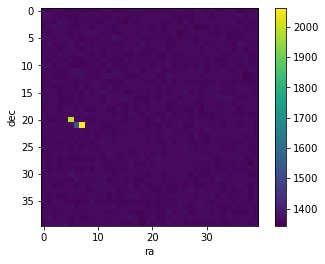

In [44]:
from matplotlib import pyplot as plt

plt.imshow(data)
plt.colorbar()
plt.xlabel('ra')
plt.ylabel('dec')
plt.show()

This image is pretty dull: let's load something more interesting.

In [45]:
#Just importing some plot parameters to make our plot look nice 

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

#Download the fits for a more interesting image
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
hdul = fits.open(image_file)

print(hdul.info())

Filename: /home/r/rbond/jorlo/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   
None


In this particular fits, we have one primary HDU, which is the image itself, as well as a table which defines a mask for the image. We'll ignore the mask for now.

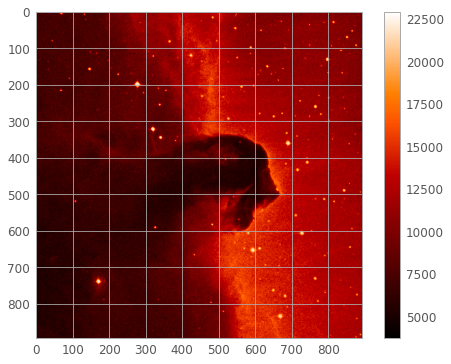

In [46]:
plt.figure()
plt.imshow(hdul[0].data)
plt.colorbar()

# ♞

## Tables with FITS

As mentioned above, FITS files are also the standard way to interact with tables in astronomy. In this case, the array in an HDU is not an image but rather a table. The syntax for accessing a table is very similar. In the below example, we are assuming the first extention is a table, which we could find out using .header or .info() if we didn't know.

In [47]:
fits_table_filename = fits.util.get_testdata_filepath('tb.fits')
hdul = fits.open(fits_table_filename)
data = hdul[1].data # assuming the first extension is a table
#hdul.close()

To access the rows of the table, we address them by their index (i.e., <code>data[0]</code>); to access the columns, which is more typical, we use <code>.field(0)</code>

In [48]:
row = data[0]
print(row)

column = data.field(0)
print(column)

(1, 'abc', 3.7000000715255736, False)
[1 2]


Each column also has a name, which we can see by simply inspecting the table as whole, or by calling <code>.header</code> on the hdul. We can address columns by their name as well as their index. When using the name, we can either use <code>.field()</code> or we can address the column like a dictionary:

In [49]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                    2                                                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4                                                  
TTYPE1  = 'c1      '           / label for field   1                            
TFORM1  = '1J      '           / data format of field: 4-byte INTEGER           
TTYPE2  = 'c2      '           / label for field   2                            
TFORM2  = '3A      '           / data format of field: ASCII Character          
TTYPE3  = 'c3      '        

In [50]:
column = data.field('c1')
print(column)

#Dictionary like:
column = data['c1']
print('Dictionary like: ', column)

[1 2]
Dictionary like:  [1 2]


The columns also exist as a separate attribute of the hdul:

In [51]:
cols = hdul[1].columns

cols.info()
print('Column names:', cols.names)

name:
    ['c1', 'c2', 'c3', 'c4']
format:
    ['1J', '3A', '1E', '1L']
unit:
    ['', '', '', '']
null:
    [-2147483647, '', '', '']
bscale:
    ['', '', 3, '']
bzero:
    ['', '', 0.4, '']
disp:
    ['I11', 'A3', 'G15.7', 'L6']
start:
    ['', '', '', '']
dim:
    ['', '', '', '']
coord_type:
    ['', '', '', '']
coord_unit:
    ['', '', '', '']
coord_ref_point:
    ['', '', '', '']
coord_ref_value:
    ['', '', '', '']
coord_inc:
    ['', '', '', '']
time_ref_pos:
    ['', '', '', '']
Column names: ['c1', 'c2', 'c3', 'c4']


Note that the individual columns (not the columns object) are simply numpy arrays, and so we can modify them with any of the standard methods for working with numpy arrays, and moreover we can feed them to any fucntion which accepts numpy arrays:

In [60]:
#We reload the data here as otherwise running this cell multiple times will not work correctly
fits_table_filename = fits.util.get_testdata_filepath('tb.fits')
hdul = fits.open(fits_table_filename)
data = hdul[1].data 

#Modifying the value of a column using indexing
print('Before zero-ing c4: ', data['c4'])
data['c4'][:] = 0
print('Before zero-ing c4: ', data['c4'])

#Performing operations on columns
print('Average of column c3: ', data['c3'].mean()  )

Before zero-ing c4:  [False  True]
Before zero-ing c4:  [False False]
Average of column c3:  5.19999989271164


If you modify a table and would like to save the changes you made to it, simply use <code>writeto()</code>:

In [61]:
hdul.writeto('newtable.fits')

# DS9

DS9 is a program for viewing FITS files. It includes tools for setting color scales, smoothing images, overlaying contours onto images, and much more. There are a number of DS9 tutorials as well as indepth user manuals available at the [DS9 Webpage](https://sites.google.com/cfa.harvard.edu/saoimageds9/documentation?authuser=0). We'll just go over a couple common proceedures here. First, ssh into Jeff's laptop using the account you made early. Make sure to use <code>-Y</code> so that it can forward the DS9 graphical interface to your computer.

<code>ssh -Y studentX@10.66.46.147</code>

To open DS9, simply type 

<code>ds9 some_image.fits</code>

For this tutorial, we've provided a FITS image for you to work with. Go ahead and open an image of a galaxy, NGC 3031, that we've already put on Jeff's laptop:

<code>ds9 /home/student0/galaxy.fits</code>

You should see an image like the one below open up. It may take a few seconds, DS9 can be slow to launch.

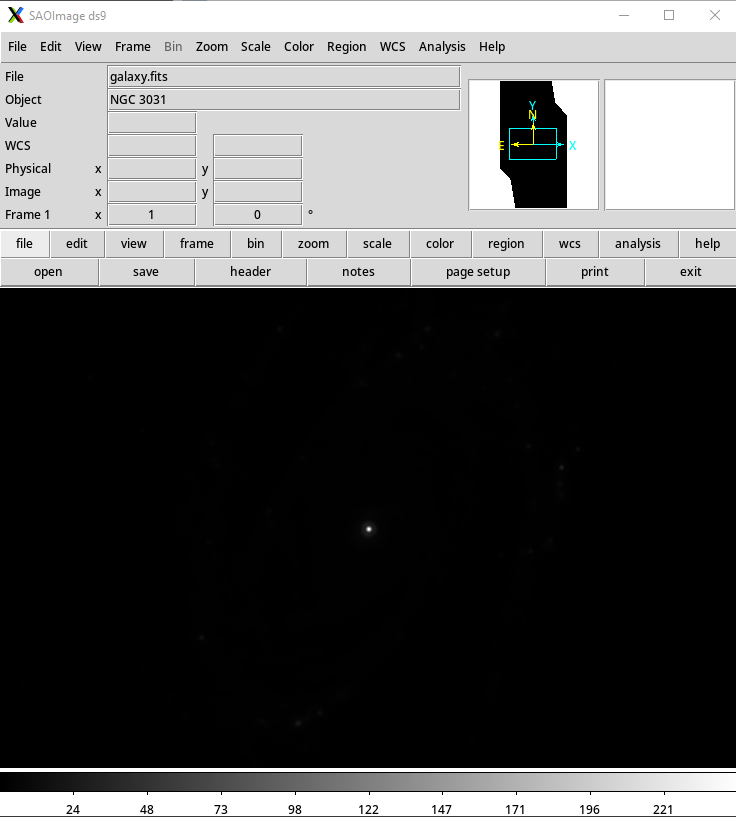

That bright dot at the center is NGC 3031. The center of the galaxy is so bright that the automatic scaling of the image is making everything else imposible to see. Let's fix that by first changing the scale to log. To do that, click Scale and then select log from the drop down menu

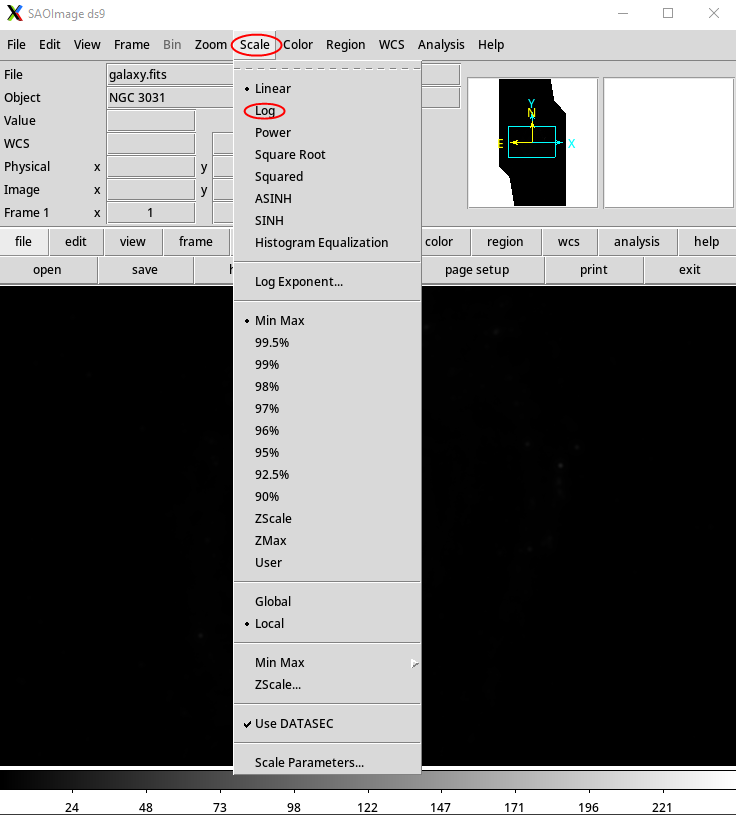

You should now have a nice, albeit greyscale, image of NGC 3031:

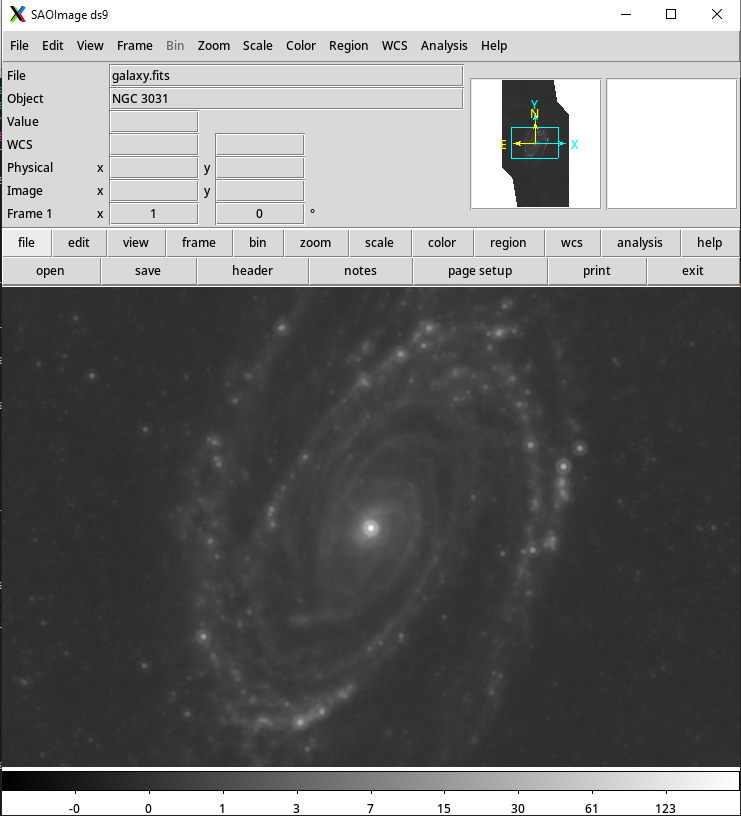

If you hover your coursor over the image, the boxes in the top left show us information about the pixel beneeth the coursor, including the value of that pixel and it's location, both in pixel space (Image x, y) and on the sky (FK5 alpha, delta which are right ascention and declination).

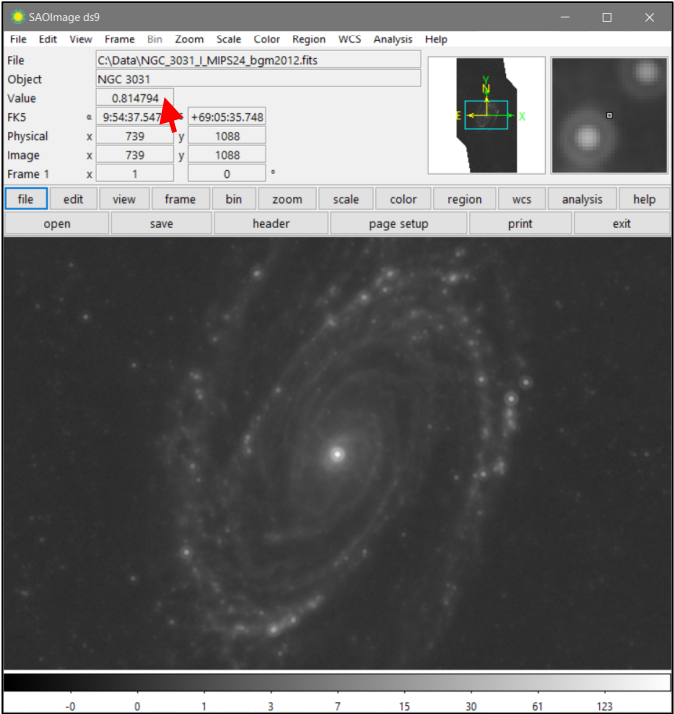

Zooming can be accomplished using the scroll wheel, or fixed zooming can be done via the Zoom drop-down menu. You can pan the image by moving the blue box in the upper right hand corner. To change the colorscale used, click the color drop-down menu, then select from the provided scales. User color scales can also be defined, although that's beyond the scope of this tutorial. In addition to changing the type of scaling between linear, log, etc., we can also change the scale bounds, which by default are the min and max pixel values in the image. To do so, click on the 'Scale' drop-down menu, then select 'Scale Parameters...'
This will open a new menu, which includes a histogram of the pixel values in the image. Near the bottom you will see boxes labeled 'Low' and 'High'. You can put whatever number you want into those boxes and it will adjust the scale acordingly. Go ahead and play with those values now and see what the results are

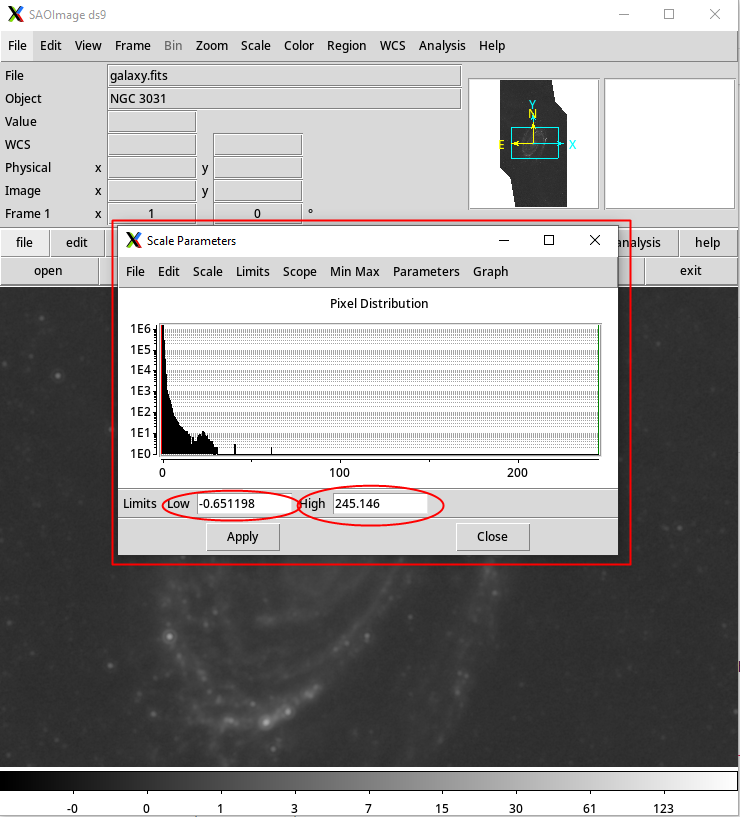

Within this menu, you can also select default low and high values scaled off of the min/max in the image: to do so, click the 'Limits' drop-down menu, and then select the percentage of the min/max you would like. 

Two more useful visualization tools that DS9 proves are smoothing and contours, both of which are accessible through the analysis drop-down menu. Smoothing is useful for replicating the effect of a resolving beam on the image, for example. You can select a number of different smoothing functions; Gaussian is fine for now. You can set the smoothing scale either via the box of the slider. Note that the radius of smoothing is in pixels. If you want to use angular degrees, you'll have to get the pixel size from the fits file as discussed above! Go ahead and smooth this image to 6" radius (6 arcseconds). The resolution columns is called 'CD1_1' and 'CD2_2' and they are in units of degrees. There is a resolution for both the x and y direction but in this case (and most cases) they are identical.

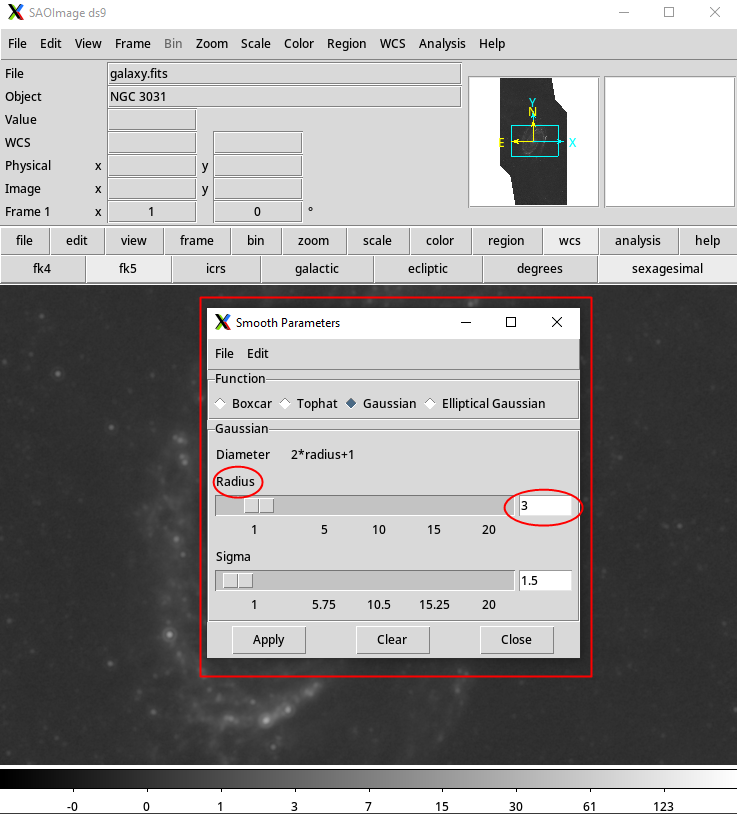

When you properly smooth your image, it will look like this:

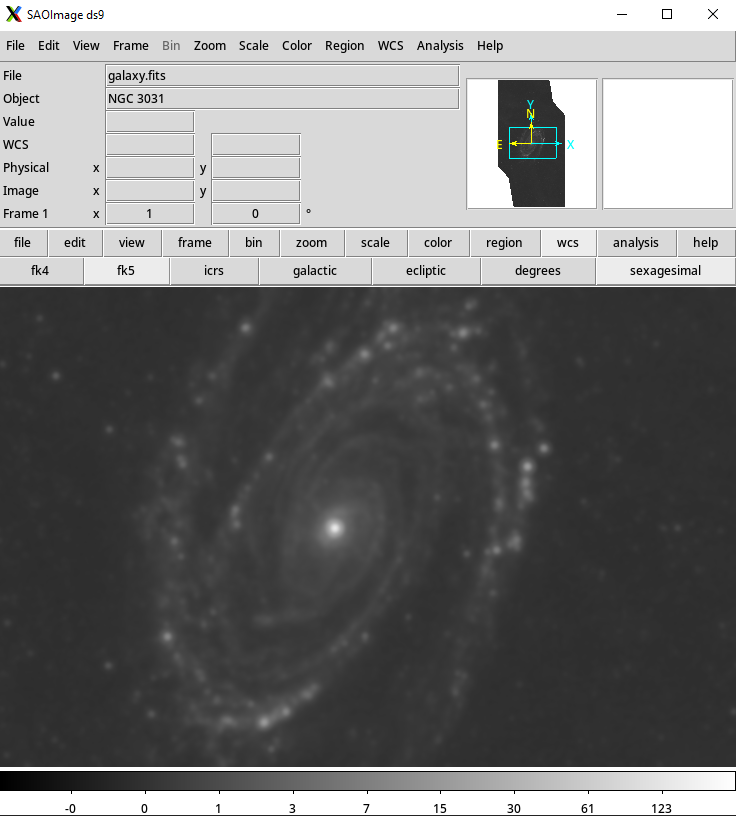

Finally, we can draw contours of fixed level in our image by selecting 'Contour Parameters...' from the 'Analysis' drop down menu. Contours allow us to visiualize large trends in our data. With the smoothing still selected, go ahead and select 'Contour Parameters...' from the 'Analsysis' drop-down menu

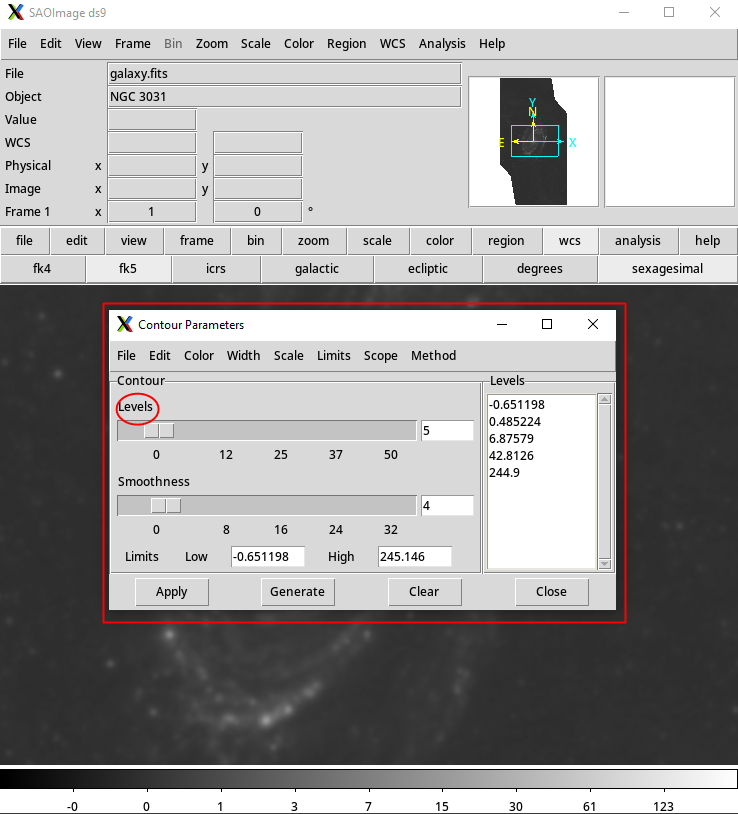

The levels slider allows us to select how many contours we would like; by default they will be evenly spaced according to the scaling selected. That is, if we have a linear scale, they will be evenly spaced in linear space, and if we have a log scale, they will be even in log space. You can also manually enter the exact levels at which you would like to have contours in the box on the right. Go a head set the number of levels to 10, then hit Generate to populate the right most box, and then hit Apply to apply them to the image.

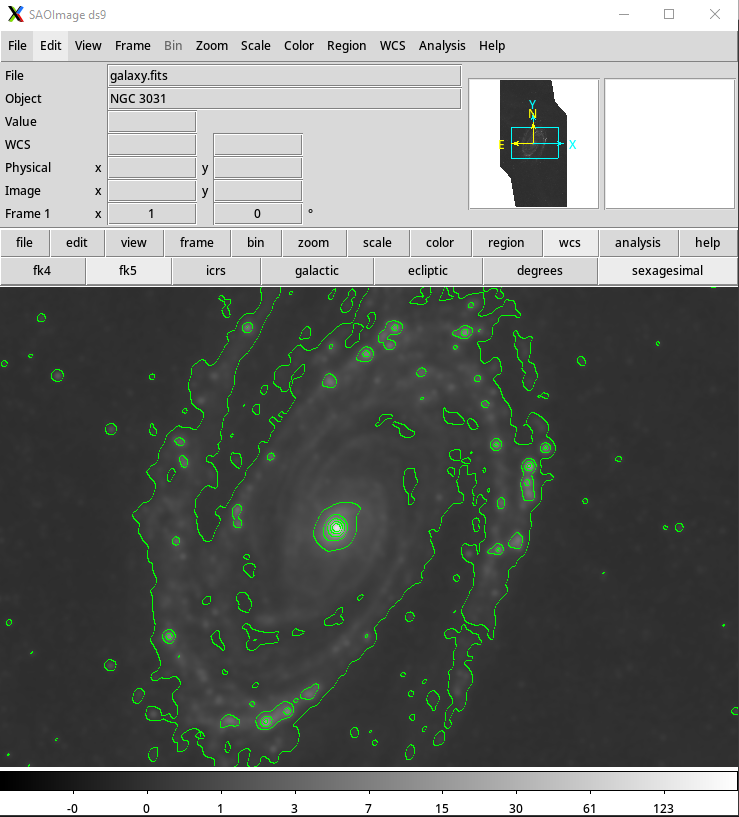